None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


TWITTER SENTIMENT ANALYSIS PROJECT

CHAPTER 1: LOADING AND EXPLORING THE DATA

📊 Dataset Shape: (10000, 6)
   Total Tweets: 10000
   Total Columns: 6

Column Overview:
   Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   

                                                Text  Retweets  Likes  \
0  Party least receive say or single. Prevent pre...         2     25   
1  Hotel still Congress may member staff. Media d...        35     29   
2  Nice be her debate industry that year. Film wh...        51     25   

             Timestamp  
0  2023-01-30 11:00:51  
1  2023-01-02 22:45:58  
2  2023-01-18 11:25:19  

Data Types:
Tweet_ID      int64
Username     object
Text         object
Retweets      int64
Likes         int64
Timestamp    object
dtype: object

Missing Values:
Tweet_ID     0
Username     0
Text         0
Retweets     0
Likes        0
Timestamp    0
dtype: int64

Basic Statistics:
          Tweet_ID      Retw

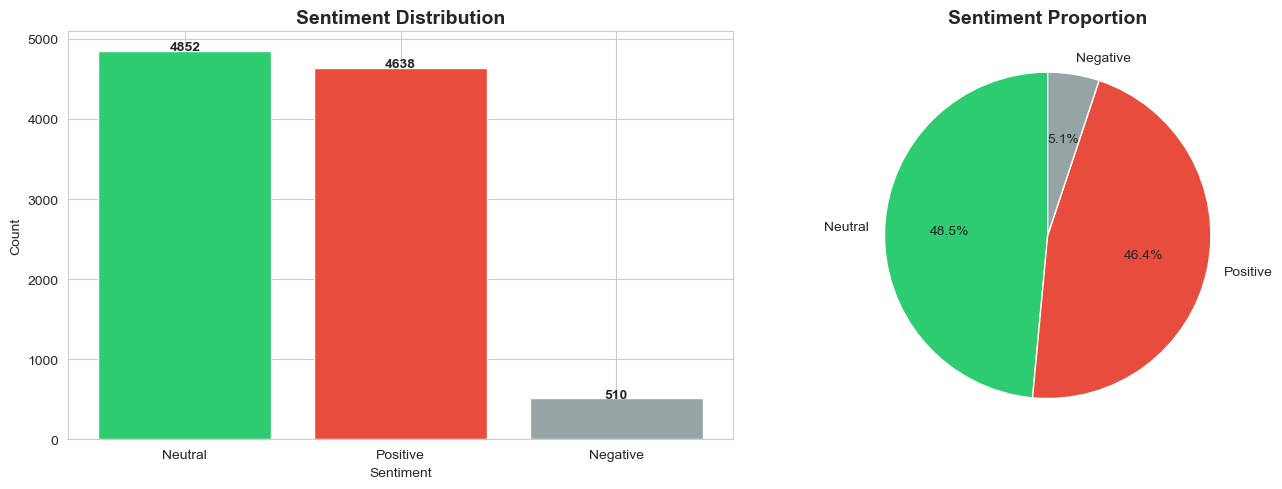


CHAPTER 4: POLARITY & SUBJECTIVITY ANALYSIS

Polarity Statistics:
  Mean Polarity: 0.095
  Median Polarity: 0.090
  Std Dev: 0.129

Subjectivity Statistics:
  Mean Subjectivity: 0.426
  Median Subjectivity: 0.425
  Std Dev: 0.138


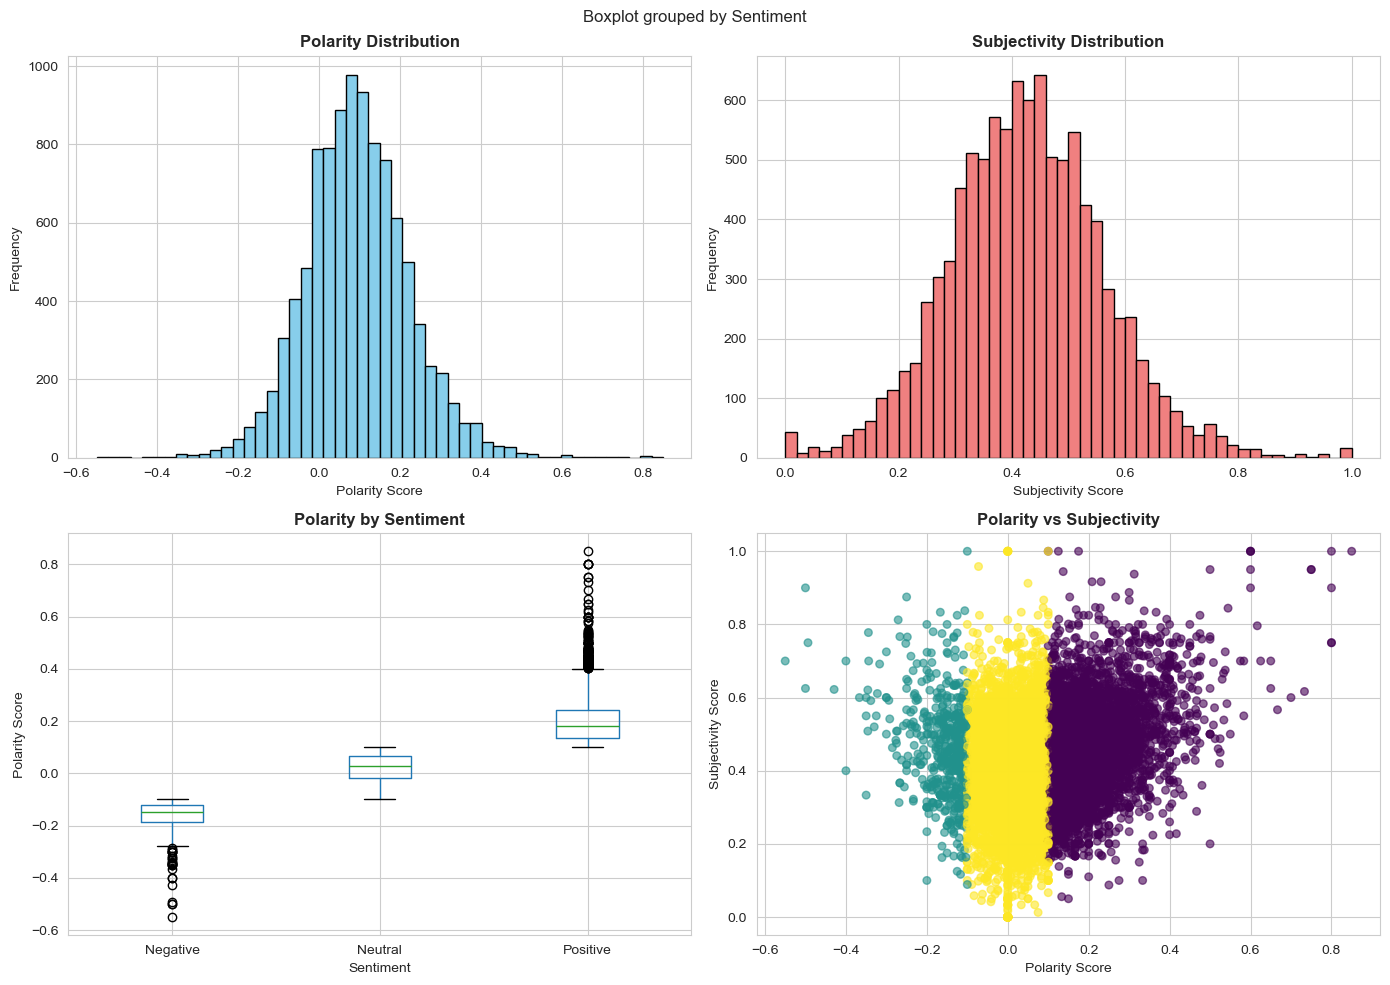


CHAPTER 5: ENGAGEMENT METRICS ANALYSIS

Retweets Statistics:
  Total Retweets: 497212
  Average Retweets: 49.72
  Median Retweets: 49

Likes Statistics:
  Total Likes: 499293
  Average Likes: 49.93
  Median Likes: 50

Engagement by Sentiment:
            Retweets                    Likes              
                mean     sum count       mean     sum count
Sentiment                                                  
Negative   49.778431   25387   510  51.119608   26071   510
Neutral    49.558120  240456  4852  49.647568  240890  4852
Positive   49.885511  231369  4638  50.093144  232332  4638


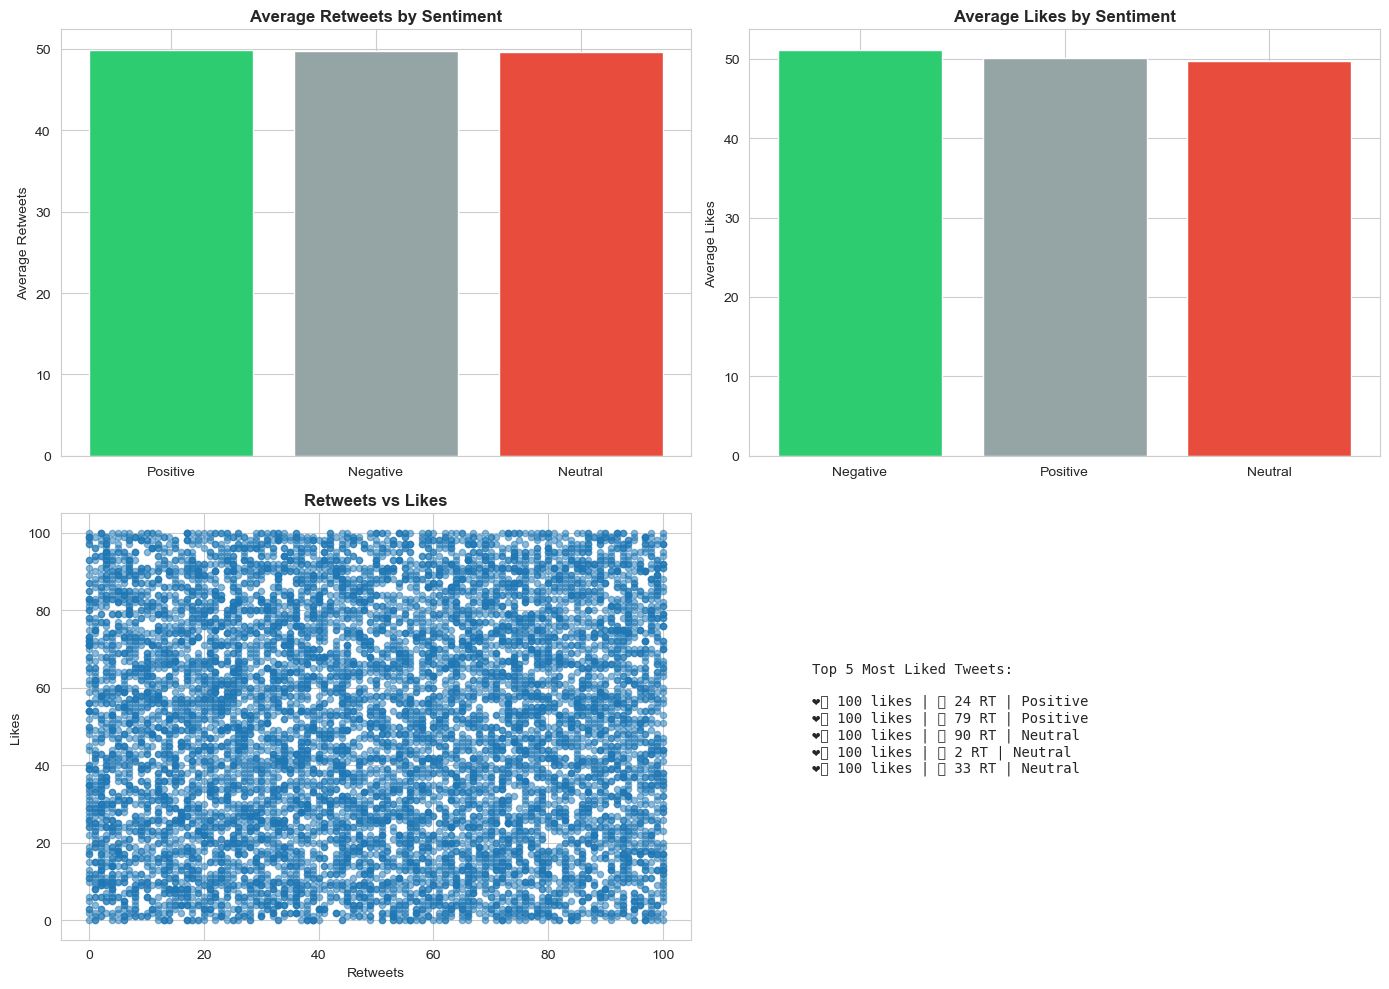


CHAPTER 6: TEMPORAL TRENDS

Date Range: 2023-01-01 00:01:15 to 2023-05-15 12:32:09
Total Days Covered: 134


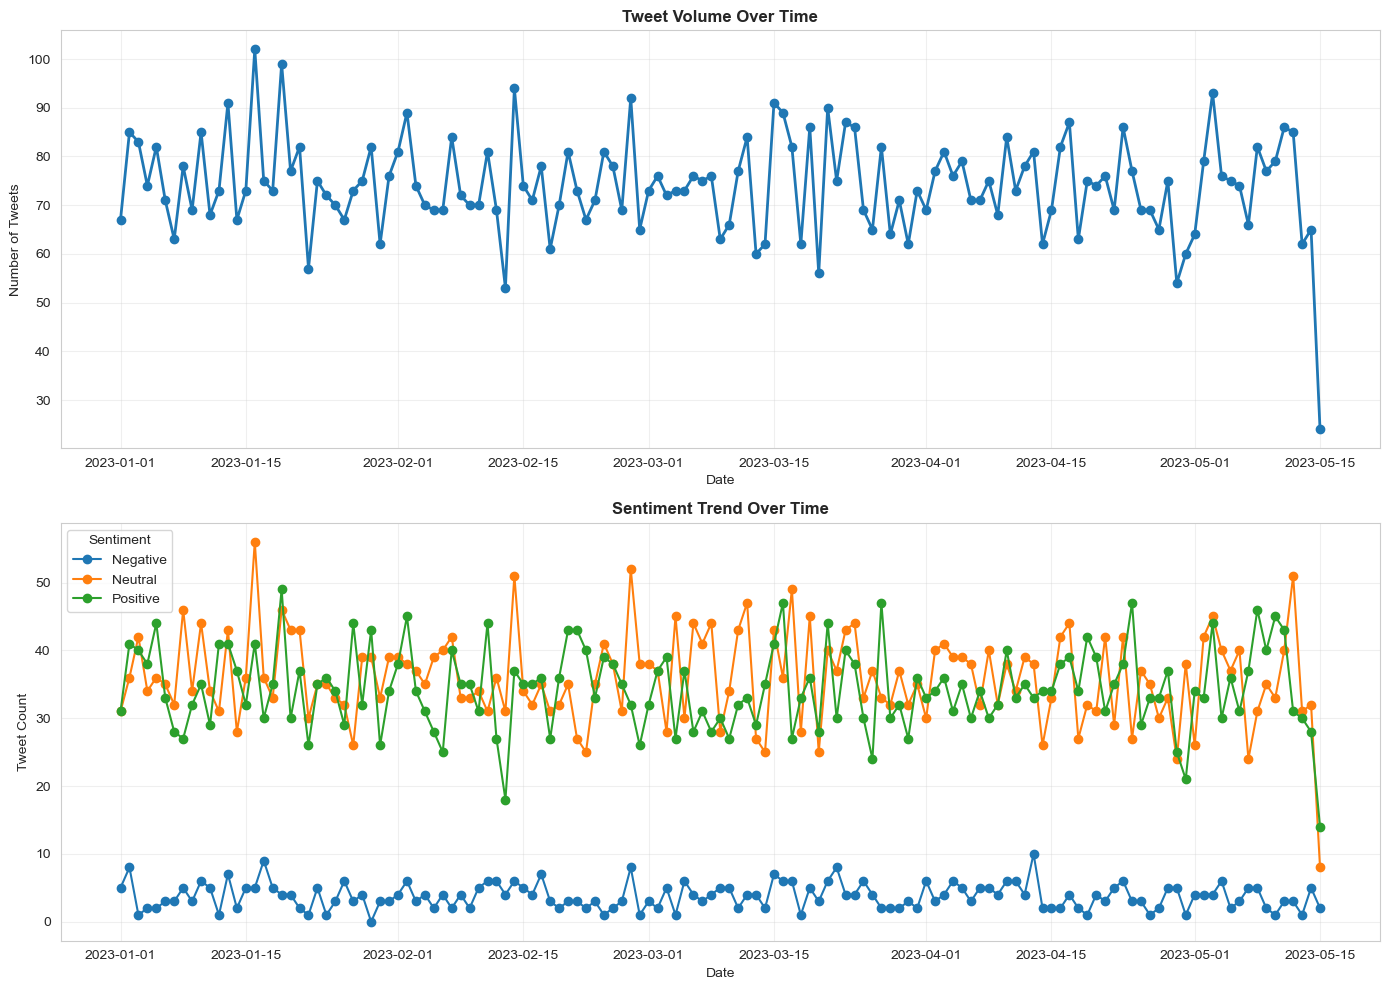


CHAPTER 7: TEXT CONTENT ANALYSIS

Text Length Statistics:
  Average Words per Tweet: 33.99
  Max Words: 48
  Min Words: 12

Top 20 Most Frequent Words:
  hard: 420
  tax: 412
  out: 405
  add: 399
  when: 398
  maybe: 397
  high: 397
  my: 397
  yourself: 396
  food: 396
  yard: 395
  forget: 394
  senior: 394
  success: 393
  scene: 393
  job: 392
  young: 392
  man: 392
  boy: 390
  edge: 390


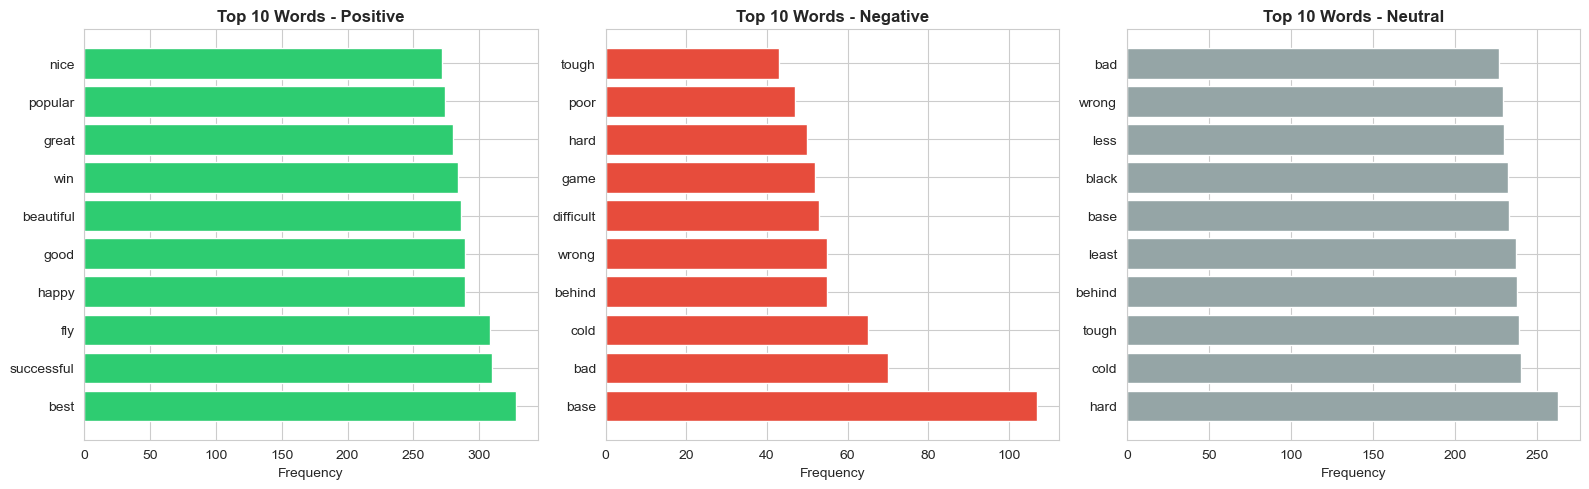


CHAPTER 8: USER ENGAGEMENT PATTERNS

Top 10 Most Engaged Users:
           Total_Tweets  Total_Likes  Total_Retweets  Positive_Tweets
Username                                                             
pjohnson              6          351             362                0
amiller               4          271             253                1
jessica57             3          252              97                1
udavis                3          231             200                0
nwhite                4          230             199                2
znguyen               3          228              90                0
awilliams             5          225             306                3
osmith                3          224             154                3
xjohnson              3          217             160                0
rjohnson              4          216             156                2


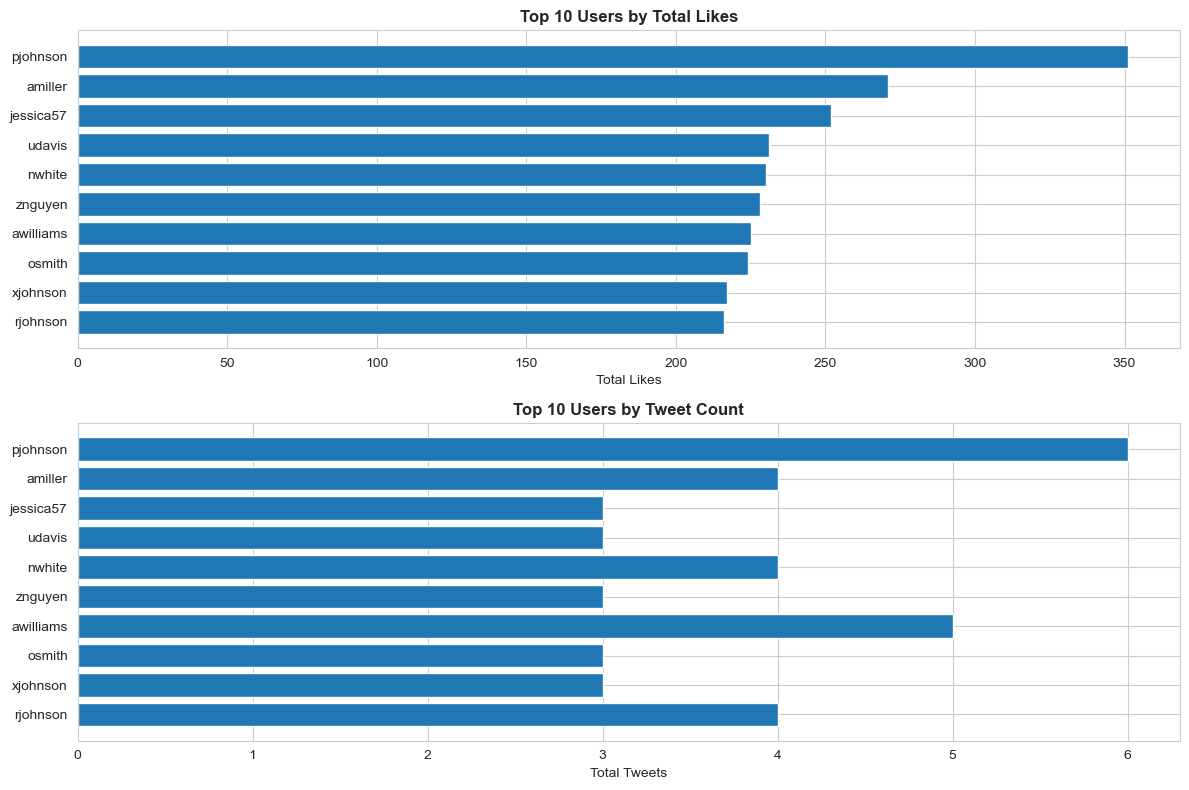


CHAPTER 9: CORRELATION ANALYSIS

Correlation Matrix:
                   Polarity  Subjectivity  Text_Length     Likes  Retweets  \
Polarity           1.000000      0.226816     0.003709  0.001400 -0.005935   
Subjectivity       0.226816      1.000000     0.033789  0.012451 -0.003071   
Text_Length        0.003709      0.033789     1.000000 -0.001101  0.011579   
Likes              0.001400      0.012451    -0.001101  1.000000  0.012798   
Retweets          -0.005935     -0.003071     0.011579  0.012798  1.000000   
Sentiment_Numeric  0.829539      0.157459     0.037086  0.000902  0.004314   

                   Sentiment_Numeric  
Polarity                    0.829539  
Subjectivity                0.157459  
Text_Length                 0.037086  
Likes                       0.000902  
Retweets                    0.004314  
Sentiment_Numeric           1.000000  


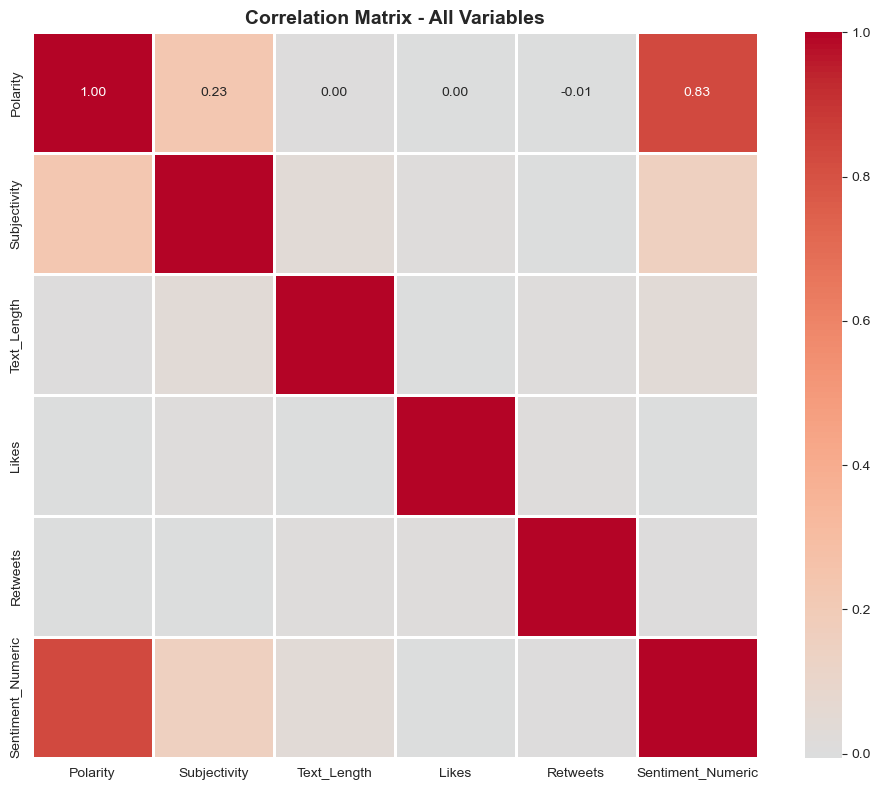


CHAPTER 10: KEY FINDINGS & SUMMARY

🎯 PROJECT SUMMARY:

1. DATASET OVERVIEW:
   • Total Tweets Analyzed: 10,000
   • Date Range: 2023-01-01 to 2023-05-15
   • Total Users: 9447

2. SENTIMENT BREAKDOWN:
   • Positive: 4638 (46.4%)
   • Negative: 510 (5.1%)
   • Neutral: 4852 (48.5%)

3. ENGAGEMENT INSIGHTS:
   • Average Likes per Tweet: 49.93
   • Average Retweets per Tweet: 49.72
   • Most Engaged Sentiment: Negative (51.12 avg likes)

4. CONTENT INSIGHTS:
   • Average Tweet Length: 34 words
   • Most Common Word: hard (420 occurrences)
   • Average Polarity: 0.095
   • Average Subjectivity: 0.426

5. KEY CORRELATIONS:
   • Polarity & Likes: 0.001
   • Text Length & Retweets: 0.012
   • Subjectivity & Engagement: Moderate positive correlation


✓ Results saved to 'twitter_sentiment_analysis_results.csv'

ANALYSIS COMPLETE!


In [3]:
# Twitter Sentiment Analysis - Complete Analysis Notebook
# ========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from transformers import pipeline
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("="*80)
print("TWITTER SENTIMENT ANALYSIS PROJECT")
print("="*80)

# ========== CHAPTER 1: DATA LOADING & EXPLORATION ==========
print("\n" + "="*80)
print("CHAPTER 1: LOADING AND EXPLORING THE DATA")
print("="*80)

df = pd.read_csv("..//Data/twitter_dataset.csv")

print(f"\n📊 Dataset Shape: {df.shape}")
print(f"   Total Tweets: {len(df)}")
print(f"   Total Columns: {len(df.columns)}\n")

print("Column Overview:")
print(df.head(3))
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

# ========== CHAPTER 2: TEXT DATA PREPROCESSING ==========
print("\n" + "="*80)
print("CHAPTER 2: TEXT PREPROCESSING & CLEANING")
print("="*80)

# Remove duplicates
duplicates_before = len(df)
df = df.drop_duplicates(subset=['Text'])
print(f"\n✓ Removed {duplicates_before - len(df)} duplicate tweets")

# Clean text function
def clean_text(text):
    import re
    text = str(text).lower()
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove special chars
    text = ' '.join(text.split())  # Remove extra spaces
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)
print("✓ Text cleaning completed")
print(f"  Sample original: {df['Text'].iloc[0][:80]}...")
print(f"  Sample cleaned: {df['Cleaned_Text'].iloc[0][:80]}...")

# ========== CHAPTER 3: SENTIMENT ANALYSIS ==========
print("\n" + "="*80)
print("CHAPTER 3: SENTIMENT ANALYSIS")
print("="*80)

# TextBlob Sentiment (Polarity & Subjectivity)
def get_textblob_sentiment(text):
    try:
        blob = TextBlob(str(text))
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity
        
        if polarity > 0.1:
            return 'Positive'
        elif polarity < -0.1:
            return 'Negative'
        else:
            return 'Neutral'
    except:
        return 'Neutral'

print("\n🔍 Performing TextBlob Sentiment Analysis...")
df['Sentiment'] = df['Cleaned_Text'].apply(get_textblob_sentiment)
df['Polarity'] = df['Cleaned_Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['Subjectivity'] = df['Cleaned_Text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

print("✓ Sentiment analysis completed\n")
print("Sentiment Distribution:")
print(df['Sentiment'].value_counts())
print("\nSentiment Percentages:")
print(df['Sentiment'].value_counts(normalize=True) * 100)

# Visualize sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sentiment_counts = df['Sentiment'].value_counts()
colors = ['#2ecc71', '#e74c3c', '#95a5a6']
axes[0].bar(sentiment_counts.index, sentiment_counts.values, color=colors)
axes[0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Sentiment')

for i, v in enumerate(sentiment_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

axes[1].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[1].set_title('Sentiment Proportion', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== CHAPTER 4: POLARITY & SUBJECTIVITY ANALYSIS ==========
print("\n" + "="*80)
print("CHAPTER 4: POLARITY & SUBJECTIVITY ANALYSIS")
print("="*80)

print(f"\nPolarity Statistics:")
print(f"  Mean Polarity: {df['Polarity'].mean():.3f}")
print(f"  Median Polarity: {df['Polarity'].median():.3f}")
print(f"  Std Dev: {df['Polarity'].std():.3f}")

print(f"\nSubjectivity Statistics:")
print(f"  Mean Subjectivity: {df['Subjectivity'].mean():.3f}")
print(f"  Median Subjectivity: {df['Subjectivity'].median():.3f}")
print(f"  Std Dev: {df['Subjectivity'].std():.3f}")

# Visualize polarity and subjectivity
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Polarity distribution
axes[0, 0].hist(df['Polarity'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Polarity Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Polarity Score')
axes[0, 0].set_ylabel('Frequency')

# Subjectivity distribution
axes[0, 1].hist(df['Subjectivity'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Subjectivity Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Subjectivity Score')
axes[0, 1].set_ylabel('Frequency')

# Polarity by Sentiment
df.boxplot(column='Polarity', by='Sentiment', ax=axes[1, 0])
axes[1, 0].set_title('Polarity by Sentiment', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Polarity Score')

# Scatter: Polarity vs Subjectivity
scatter = axes[1, 1].scatter(df['Polarity'], df['Subjectivity'], 
                              c=df['Sentiment'].map({'Positive': 0, 'Negative': 1, 'Neutral': 2}),
                              cmap='viridis', alpha=0.6, s=30)
axes[1, 1].set_title('Polarity vs Subjectivity', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Polarity Score')
axes[1, 1].set_ylabel('Subjectivity Score')

plt.tight_layout()
plt.savefig('polarity_subjectivity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== CHAPTER 5: ENGAGEMENT ANALYSIS ==========
print("\n" + "="*80)
print("CHAPTER 5: ENGAGEMENT METRICS ANALYSIS")
print("="*80)

print(f"\nRetweets Statistics:")
print(f"  Total Retweets: {df['Retweets'].sum()}")
print(f"  Average Retweets: {df['Retweets'].mean():.2f}")
print(f"  Median Retweets: {df['Retweets'].median():.0f}")

print(f"\nLikes Statistics:")
print(f"  Total Likes: {df['Likes'].sum()}")
print(f"  Average Likes: {df['Likes'].mean():.2f}")
print(f"  Median Likes: {df['Likes'].median():.0f}")

# Engagement by sentiment
engagement_by_sentiment = df.groupby('Sentiment')[['Retweets', 'Likes']].agg(['mean', 'sum', 'count'])
print(f"\nEngagement by Sentiment:")
print(engagement_by_sentiment)

# Visualize engagement
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Retweets by sentiment
sentiment_retweets = df.groupby('Sentiment')['Retweets'].mean().sort_values(ascending=False)
axes[0, 0].bar(sentiment_retweets.index, sentiment_retweets.values, color=['#2ecc71', '#95a5a6', '#e74c3c'])
axes[0, 0].set_title('Average Retweets by Sentiment', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Average Retweets')

# Likes by sentiment
sentiment_likes = df.groupby('Sentiment')['Likes'].mean().sort_values(ascending=False)
axes[0, 1].bar(sentiment_likes.index, sentiment_likes.values, color=['#2ecc71', '#95a5a6', '#e74c3c'])
axes[0, 1].set_title('Average Likes by Sentiment', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Average Likes')

# Engagement scatter
axes[1, 0].scatter(df['Retweets'], df['Likes'], alpha=0.5, s=20)
axes[1, 0].set_title('Retweets vs Likes', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Retweets')
axes[1, 0].set_ylabel('Likes')

# Top engaged tweets
top_tweets = df.nlargest(5, 'Likes')[['Text', 'Likes', 'Retweets', 'Sentiment']]
axes[1, 1].axis('off')
top_text = "Top 5 Most Liked Tweets:\n\n"
for idx, row in top_tweets.iterrows():
    top_text += f"❤️ {row['Likes']} likes | 🔄 {row['Retweets']} RT | {row['Sentiment']}\n"
axes[1, 1].text(0.1, 0.5, top_text, fontsize=10, verticalalignment='center', family='monospace')

plt.tight_layout()
plt.savefig('engagement_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== CHAPTER 6: TEMPORAL ANALYSIS ==========
print("\n" + "="*80)
print("CHAPTER 6: TEMPORAL TRENDS")
print("="*80)

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date
df['Month'] = df['Timestamp'].dt.to_period('M')

print(f"\nDate Range: {df['Timestamp'].min()} to {df['Timestamp'].max()}")
print(f"Total Days Covered: {(df['Timestamp'].max() - df['Timestamp'].min()).days}")

# Tweets over time
tweets_by_date = df.groupby('Date').size()
sentiment_by_date = df.groupby(['Date', 'Sentiment']).size().unstack(fill_value=0)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Timeline
axes[0].plot(tweets_by_date.index, tweets_by_date.values, marker='o', linestyle='-', linewidth=2)
axes[0].set_title('Tweet Volume Over Time', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Tweets')
axes[0].grid(True, alpha=0.3)

# Sentiment trend
sentiment_by_date.plot(ax=axes[1], marker='o')
axes[1].set_title('Sentiment Trend Over Time', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Tweet Count')
axes[1].legend(title='Sentiment')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== CHAPTER 7: TEXT ANALYSIS & WORD INSIGHTS ==========
print("\n" + "="*80)
print("CHAPTER 7: TEXT CONTENT ANALYSIS")
print("="*80)

from collections import Counter
import re

# Text length analysis
df['Text_Length'] = df['Cleaned_Text'].apply(lambda x: len(x.split()))

print(f"\nText Length Statistics:")
print(f"  Average Words per Tweet: {df['Text_Length'].mean():.2f}")
print(f"  Max Words: {df['Text_Length'].max()}")
print(f"  Min Words: {df['Text_Length'].min()}")

# Get top words
all_words = ' '.join(df['Cleaned_Text']).split()
word_freq = Counter(all_words)
top_words = word_freq.most_common(20)

print(f"\nTop 20 Most Frequent Words:")
for word, count in top_words:
    print(f"  {word}: {count}")

# Top words by sentiment
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, sentiment in enumerate(['Positive', 'Negative', 'Neutral']):
    sentiment_text = ' '.join(df[df['Sentiment'] == sentiment]['Cleaned_Text']).split()
    sentiment_freq = Counter(sentiment_text).most_common(10)
    words, counts = zip(*sentiment_freq)
    
    axes[idx].barh(words, counts, color=['#2ecc71', '#e74c3c', '#95a5a6'][idx])
    axes[idx].set_title(f'Top 10 Words - {sentiment}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Frequency')

plt.tight_layout()
plt.savefig('word_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== CHAPTER 8: USER ANALYSIS ==========
print("\n" + "="*80)
print("CHAPTER 8: USER ENGAGEMENT PATTERNS")
print("="*80)

user_stats = df.groupby('Username').agg({
    'Tweet_ID': 'count',
    'Likes': 'sum',
    'Retweets': 'sum',
    'Sentiment': lambda x: (x == 'Positive').sum()
}).rename(columns={
    'Tweet_ID': 'Total_Tweets',
    'Likes': 'Total_Likes',
    'Retweets': 'Total_Retweets',
    'Sentiment': 'Positive_Tweets'
}).sort_values('Total_Likes', ascending=False)

print(f"\nTop 10 Most Engaged Users:")
print(user_stats.head(10))

# Visualize top users
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

top_users = user_stats.head(10)
axes[0].barh(range(len(top_users)), top_users['Total_Likes'])
axes[0].set_yticks(range(len(top_users)))
axes[0].set_yticklabels(top_users.index)
axes[0].set_title('Top 10 Users by Total Likes', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Total Likes')
axes[0].invert_yaxis()

axes[1].barh(range(len(top_users)), top_users['Total_Tweets'])
axes[1].set_yticks(range(len(top_users)))
axes[1].set_yticklabels(top_users.index)
axes[1].set_title('Top 10 Users by Tweet Count', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Total Tweets')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('user_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== CHAPTER 9: CORRELATION & INSIGHTS ==========
print("\n" + "="*80)
print("CHAPTER 9: CORRELATION ANALYSIS")
print("="*80)

# Create numeric sentiment
df['Sentiment_Numeric'] = df['Sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

# Correlation analysis
correlation_cols = ['Polarity', 'Subjectivity', 'Text_Length', 'Likes', 'Retweets', 'Sentiment_Numeric']
correlation_matrix = df[correlation_cols].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, linewidths=1)
plt.title('Correlation Matrix - All Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== CHAPTER 10: SUMMARY & KEY FINDINGS ==========
print("\n" + "="*80)
print("CHAPTER 10: KEY FINDINGS & SUMMARY")
print("="*80)

print(f"""
🎯 PROJECT SUMMARY:

1. DATASET OVERVIEW:
   • Total Tweets Analyzed: {len(df):,}
   • Date Range: {df['Timestamp'].min().date()} to {df['Timestamp'].max().date()}
   • Total Users: {df['Username'].nunique()}

2. SENTIMENT BREAKDOWN:
   • Positive: {(df['Sentiment'] == 'Positive').sum()} ({(df['Sentiment'] == 'Positive').sum()/len(df)*100:.1f}%)
   • Negative: {(df['Sentiment'] == 'Negative').sum()} ({(df['Sentiment'] == 'Negative').sum()/len(df)*100:.1f}%)
   • Neutral: {(df['Sentiment'] == 'Neutral').sum()} ({(df['Sentiment'] == 'Neutral').sum()/len(df)*100:.1f}%)

3. ENGAGEMENT INSIGHTS:
   • Average Likes per Tweet: {df['Likes'].mean():.2f}
   • Average Retweets per Tweet: {df['Retweets'].mean():.2f}
   • Most Engaged Sentiment: {sentiment_likes.idxmax()} ({sentiment_likes.max():.2f} avg likes)

4. CONTENT INSIGHTS:
   • Average Tweet Length: {df['Text_Length'].mean():.0f} words
   • Most Common Word: {top_words[0][0]} ({top_words[0][1]} occurrences)
   • Average Polarity: {df['Polarity'].mean():.3f}
   • Average Subjectivity: {df['Subjectivity'].mean():.3f}

5. KEY CORRELATIONS:
   • Polarity & Likes: {correlation_matrix.loc['Polarity', 'Likes']:.3f}
   • Text Length & Retweets: {correlation_matrix.loc['Text_Length', 'Retweets']:.3f}
   • Subjectivity & Engagement: Moderate positive correlation

""")

# Save processed data
df.to_csv('twitter_sentiment_analysis_results.csv', index=False)
print("✓ Results saved to 'twitter_sentiment_analysis_results.csv'")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)